In [1]:
# Author: Simeng Sun
import scipy.io as sio
import numpy as np
import pickle
import sklearn
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
! pip install gdown
! gdown https://drive.google.com/uc?id=1UfTOIgYEuwErzFGnaNqGlBksaQXenc9l

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1UfTOIgYEuwErzFGnaNqGlBksaQXenc9l
To: /Users/deep/Documents/study/F19/890T/data.pkl
9.42MB [00:00, 21.3MB/s]


In [3]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
X, Y = data['X'], data['Y']

In [5]:
print("Size of X {}, size of Y {}".format(X.shape, Y.shape))

Size of X (12000, 784), size of Y (12000, 1)


Now let's look at some examples in the data set

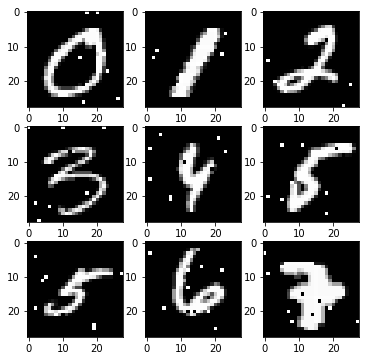

In [6]:
fig = plt.figure(figsize=(6, 6))
col, row = 3, 3
sample_idx = [1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3]
for i in range(1, col*row + 1):
    image = np.reshape(X[int(sample_idx[i-1])], (28, 28))
    fig.add_subplot(3, 3, i)
    plt.imshow(image, cmap='gray')
plt.show()

In [7]:
def plot_pca():
    global n_pc
    pca = PCA(n_components=int(n_pc))
    pca.fit(X)
    fig = plt.figure(figsize=(6, 6))
    col, row = 3, 3
    sample_idx = [1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3]
    for i in range(1, col*row + 1):
        new_x = pca.transform([X[int(sample_idx[i-1])]])
        new_x = pca.inverse_transform(new_x)
        image = np.reshape(new_x, (28, 28))
        fig.add_subplot(3, 3, i)
        plt.imshow(image, cmap='gray')
    plt.show()

In [8]:
wn_pc = widgets.FloatSlider(
    value=0,
    min=0,
    max=784,
    step=1,
    description='number of principal components',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True)

In [9]:
items1 = [wn_pc]
whbox1 = widgets.HBox(items1)

def on_npc_change(change):
    global n_pc
    n_pc = change.new
    plot_pca()

wn_pc.observe(on_npc_change, names='value')

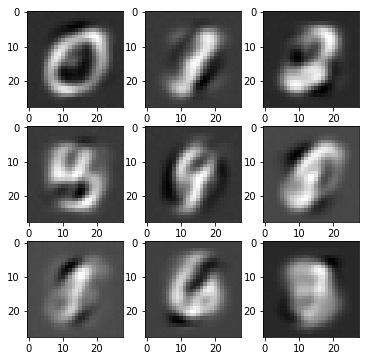

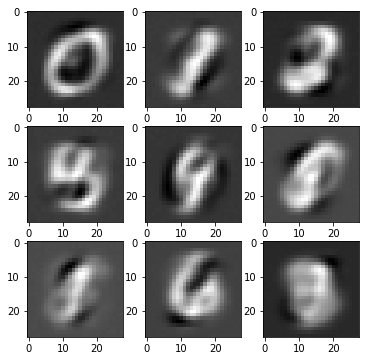

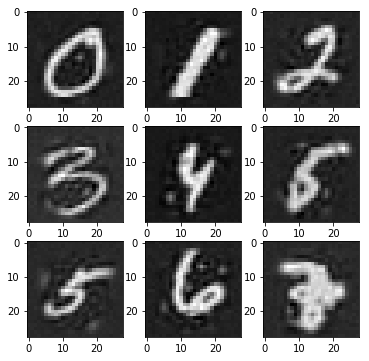

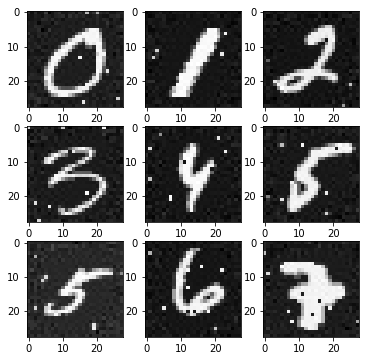

In [16]:
def init_demo():

    global n_pc
    
    n_pc=10
    
    wn_pc.value=n_pc

    plot_pca()

display(whbox1)
init_demo()


